# Introduction to Numpy
- Numpy is a fixed size array of items of the same type.
- Numpy or numeric python is predominantly used for numerical operations.
- Numpy arrays support statistical, probability, and linear algebra operators.

## Declaring and initialing an array

In [3]:
def print_pairs(var_name, x):
    #txt = "{}: \'{}\'\n{}.shape: \'{}\'".format(var_name, var_name)
    print("{}: {}\n{}.shape: {}".format(var_name, x, var_name, x.shape))

### Manual Initialization

In [4]:
import numpy as np
a = np.array([1,2,3])
print_pairs('a', a)

a: [1 2 3]
a.shape: (3,)


### Manual Initialization - multi-dimensional

In [158]:
b = np.array([[1, 2, 3], 
             [4, 5, 6]])
print_pairs('b', b)

b: [[1 2 3]
 [4 5 6]]
b.shape: (2, 3)


### Tensor filled with zeros

In [159]:
c = np.zeros(shape=(2,2)) 
c1 = np.zeros_like(b)
print_pairs('c', c)
print_pairs('c1', c1)

c: [[0. 0.]
 [0. 0.]]
c.shape: (2, 2)
c1: [[0 0 0]
 [0 0 0]]
c1.shape: (2, 3)


### Tensor filled with ones

In [160]:
d = np.ones(shape=(2,2)) 
d1 = np.ones_like(b)
print_pairs('d', d)
print_pairs('d1', d1)

d: [[1. 1.]
 [1. 1.]]
d.shape: (2, 2)
d1: [[1 1 1]
 [1 1 1]]
d1.shape: (2, 3)


### Tensor filled with a constant

In [161]:
import random
e = np.full(shape=(2, 2), fill_value=7)
e1 = np.full_like(b, fill_value=5)
print_pairs('e', e)
print_pairs('e1', e1)

e: [[7 7]
 [7 7]]
e.shape: (2, 2)
e1: [[5 5 5]
 [5 5 5]]
e1.shape: (2, 3)


### Tensor built from a range

In [54]:
f = np.arange(0, 9)
print_pairs('f', f)

f: [0 1 2 3 4 5 6 7 8]
f.shape: (9,)


### Assignment vs np.copy()

In [55]:
g = f
h = f.copy()
f.resize((3, 3))
print_pairs('g', g)
print_pairs('h', h)

g: [[0 1 2]
 [3 4 5]
 [6 7 8]]
g.shape: (3, 3)
h: [0 1 2 3 4 5 6 7 8]
h.shape: (9,)


In [150]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
def plotter():
    xuni = np.random.uniform(0,1,1000) # You are generating 1000 points between 0 and 1.
    xnorm = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    ynorm = stats.norm.pdf(xnorm, mu, sigma)
    xpois = np.arange(100, 200, .5)
    ypois = stats.poisson.pmf(xpois, 150)
    xg = np.arange(100, 200, .5)
    yg = stats.gamma.pdf(xg, a=29, scale=3)

    fig, axs = plt.subplots(2, 2, figsize=(10, 5))
    axs[0, 0].plot(xnorm, ynorm, 'tab:green')
    axs[0, 0].set_title('random normal')
    axs[0, 1].hist(xuni, bins=20, facecolor='lightblue')
    axs[0, 1].set_title('random uniform')
    axs[1, 0].plot(xpois, ypois, 'tab:orange')
    axs[1, 0].set_title('poisson')
    axs[1, 1].plot(xg, yg, 'tab:blue')
    axs[1, 1].set_title('Gamma')


    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()

### Random Distributions

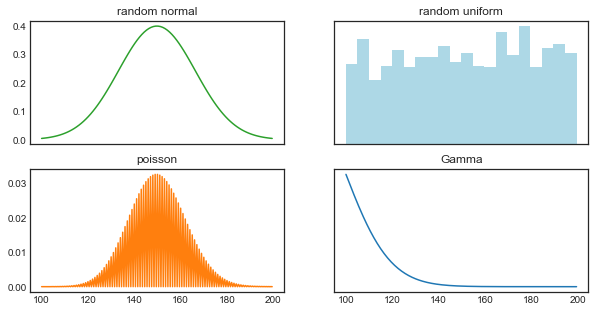

In [151]:
plotter()

In [5]:
a = np.random.normal(loc=0, scale=1, size=(1000, 1))
b = np.random.uniform(low = 0, high=1 ,size=(1000, 1))
c = np.random.poisson(lam=150)
d = np.random.gamma(shape=29, scale=3, size=(1000, 1))

## Axis
- Axis refers to dimension of a tensor.
- In a one-dimensional array, there is only one axis, 0.
- A two dimensional array has two axis, 0 for row and 1 for columns.

In [62]:
a = np.arange(0, 6)
print("a with shape {}".format(a.shape))
print("a: {}\nmax on axis=0{}".format(a, a.max(axis=0)))
a = a.reshape((6, 1))
print("\na after reshaping to (6,1)".format(a.shape))
print("a: {}\nmax on axis=1{}".format(a, a.max(axis=1)))

a with shape (6,)
a: [0 1 2 3 4 5]
max on axis=05

a after reshaping to (6,1)
a: [[0]
 [1]
 [2]
 [3]
 [4]
 [5]]
max on axis=1[0 1 2 3 4 5]


In [56]:
a = np.arange(24).reshape(4,6)
(a, np.max(a, axis=0), np.max(a, axis=1))
for i in range(4):
    print(a[i], np.mean(a[i]))

[0 1 2 3 4 5] 2.5
[ 6  7  8  9 10 11] 8.5
[12 13 14 15 16 17] 14.5
[18 19 20 21 22 23] 20.5


## Sunsetting and slicing

In [107]:
a = np.arange(24).reshape(4, 6)
print("a:\n{}\ncol 0 and 1:\n{}\nrow 1: {}\nrow 1 col 2 and 3:{} ".format(a[:], a[:,0:2], a[3,:], a[1, 2:4]))

a:
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
col 0 and 1:
[[ 0  1]
 [ 6  7]
 [12 13]
 [18 19]]
row 1: [18 19 20 21 22 23]
row 1 col 2 and 3:[8 9] 


## np.reshape vs. np.resize
- resize truncates or adds values if the shape does not match. Added values follow the logic based on which the array was created.
- reshape will throw an exception of shapes do not match.

In [121]:
a, b, c = np.arange(4), np.ones_like(a), np.full_like(a, fill_value=5)
(a, b, c)

(array([0, 1, 2, 3]), array([1, 1, 1, 1]), array([5, 5, 5, 5]))

In [120]:
(np.resize(a, 7), np.resize(b, 7), np.resize(c, 3), c.reshape(2,2))

(array([0, 1, 2, 3, 0, 1, 2]),
 array([1, 1, 1, 1, 1, 1, 1]),
 array([5, 5, 5]),
 array([[5, 5],
        [5, 5]]))

In [127]:
np.insert(a, 3, values=12)
np.append(a, 12)

array([ 0,  1,  2,  3, 12])

## Saving Tensors
- Often after heavy pre-processing it does make sense to save the information that are to be used for model training.
- numpy can save arrays 